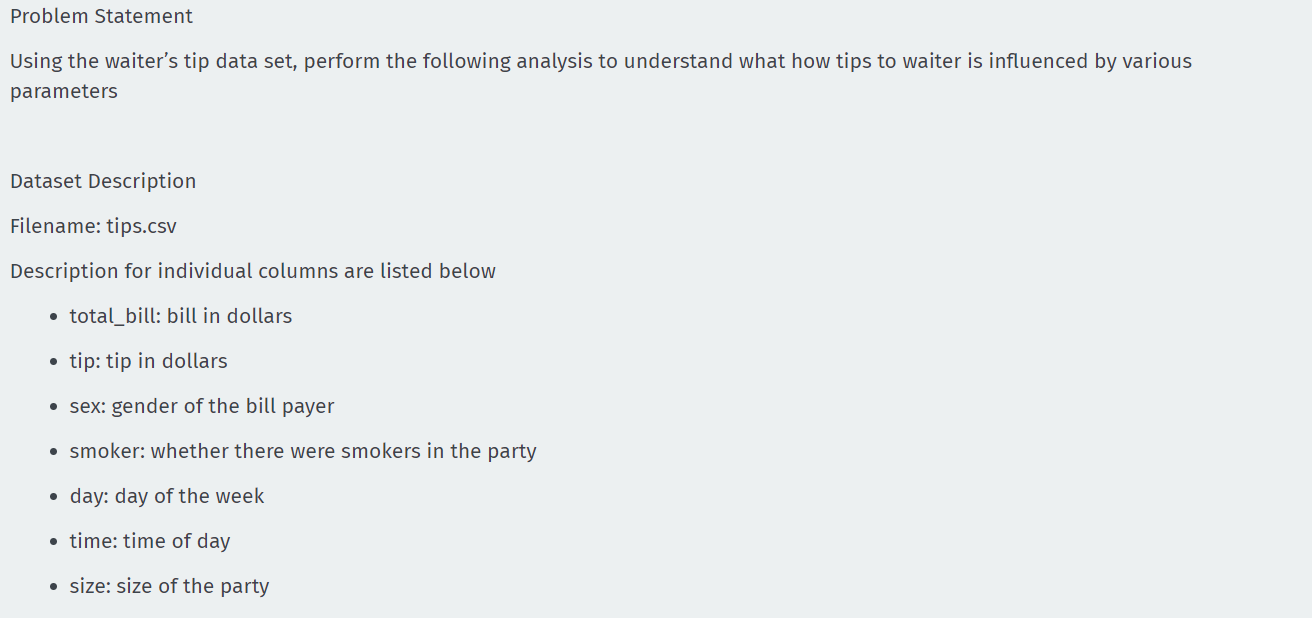

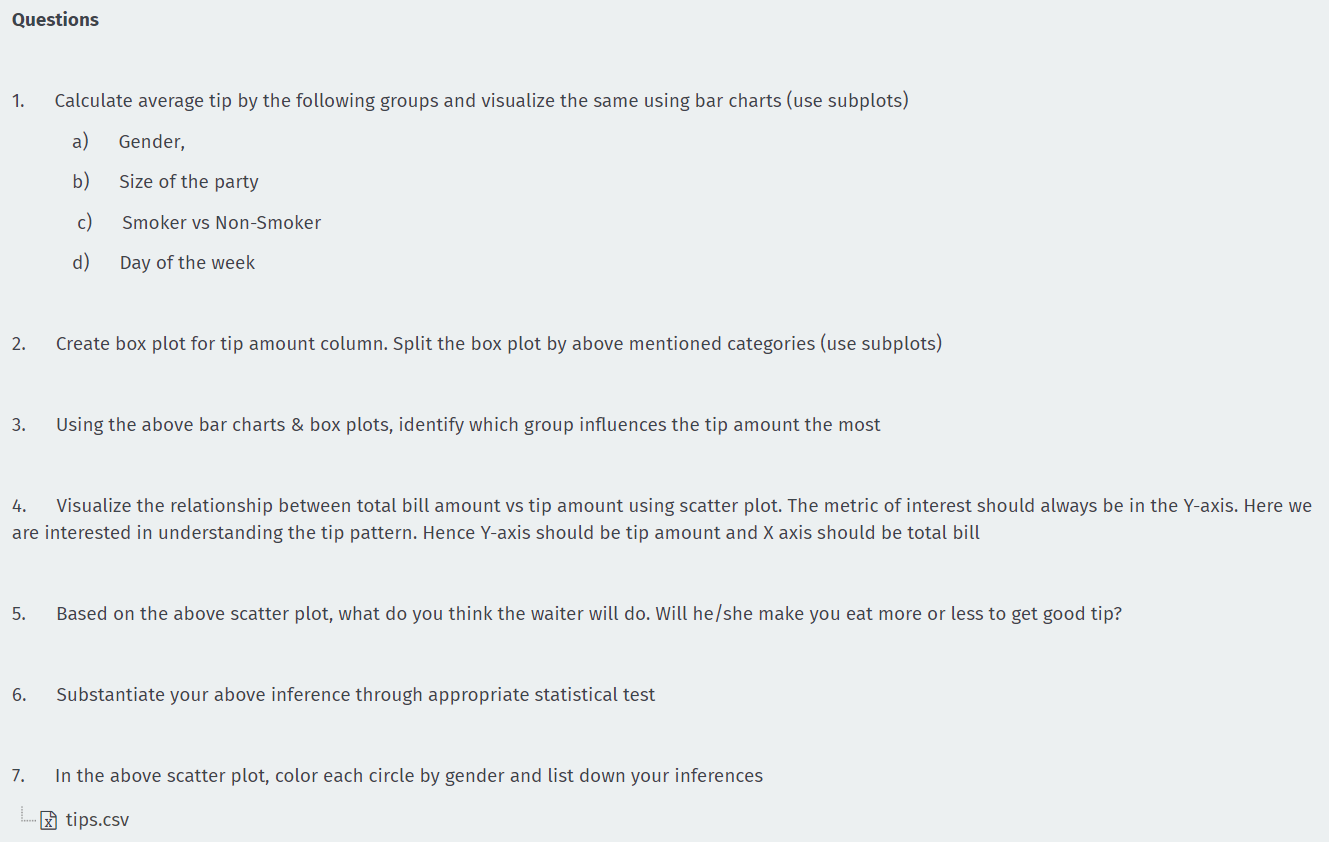

In [64]:
#import libraries
import numpy as np
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
#import data
tips = pd.read_csv(r'C:\Users\nismai01\OneDrive - Teranet\Documents\tips.csv')
#tips.head(10)

In [7]:
#groupy gender
tips.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [8]:
tips.groupby('size').mean()

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


In [9]:
tips.groupby('smoker').mean()

,total_bill,tip,size
smoker,,,
No,19.188278,2.991854,2.668874
Yes,20.756344,3.008710,2.408602


<AxesSubplot:xlabel='day'>

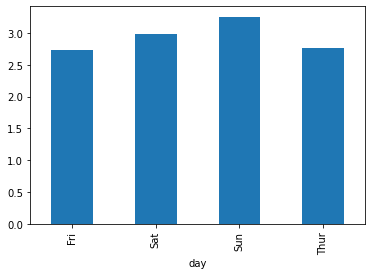

In [19]:
daygroup = tips.groupby('day').mean()
daygroup['tip'].plot(kind='bar')

<AxesSubplot:xlabel='sex'>

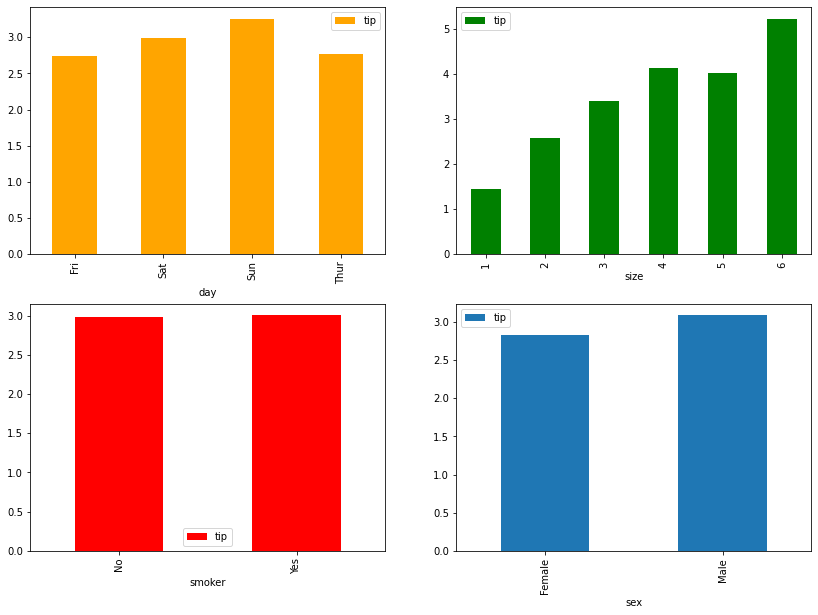

In [111]:
f, axes = plt.subplots(2,2,figsize = (14,10))
tips[['day','tip']].groupby('day').mean().plot(kind='bar',color="orange", ax=axes[0,0])
tips[['size','tip']].groupby('size').mean().plot(kind='bar', color="g", ax=axes[0,1])
tips[['smoker','tip']].groupby('smoker').mean().plot(kind='bar',color="r", ax=axes[1,0])
tips[['sex','tip']].groupby('sex').mean().plot(kind='bar', ax=axes[1,1])


<AxesSubplot:xlabel='tip', ylabel='size_bin'>

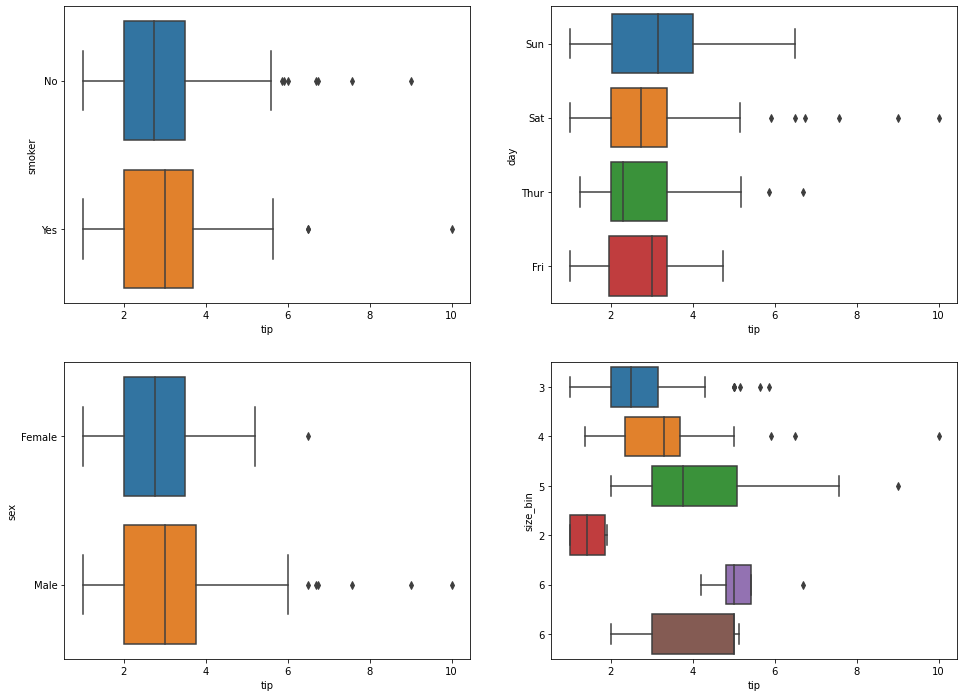

In [116]:
f, axes = plt.subplots(2,2,figsize = (16,12))

sns.boxplot(x='tip',y='smoker', data=tips ,ax=axes[0,0])
sns.boxplot(x='tip',y='day',  data=tips ,ax=axes[0,1])
sns.boxplot(x='tip',y='sex',  data=tips ,ax=axes[1,0])

size_bins = [1,2,3,4,5,6]
labels={0:'1',
        1:'2',
        2:'3',
        3:'4',
       4:'5',
       5:'6'}
tips['size_bin']=tips['size'].apply(lambda v:np.digitize(v,bins=size_bins)).replace(labels)
tips['size_bin'].value_counts()
tips
sns.boxplot(x='tip',y='size_bin',  data=tips ,ax=axes[1,1])

The data given is skewed towards men. 
Average tip amount increases on sundays.
Large groups can bring in big tips
Clients being smoker or non-smokers don't have much dependency on the tip given.
Large groups are rare to come in. Groups of 3-5 are most common

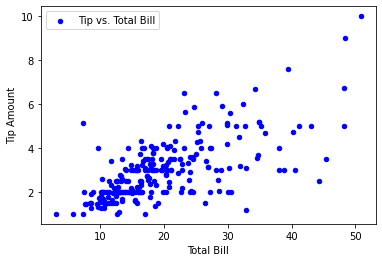

In [94]:
ax = tips.plot(kind="scatter", x="total_bill",y="tip", color="b", label="Tip vs. Total Bill")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip Amount")
plt.show()

From the scatter plot its evident that the tip amount increases larger the total bill. The waiter would enocourage you to have costly dishes rather than make you eat more.

<AxesSubplot:xlabel='sex', ylabel='day'>

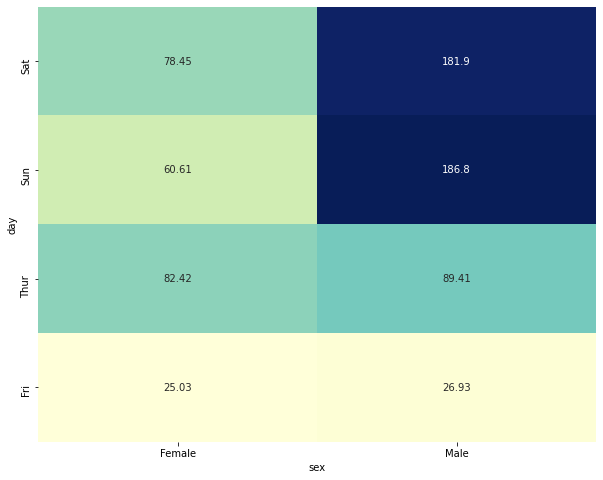

In [106]:
pivot = tips.pivot_table(index='day', values='tip',columns='sex',
               aggfunc=sum, fill_value=0,margins=True).sort_values(by="All", ascending=False).head(10)[1:]

plt.figure(figsize=(10, 8))
sns.heatmap(pivot.drop('All', axis=1),cmap="YlGnBu", annot=True, fmt = '.4g', cbar=False)

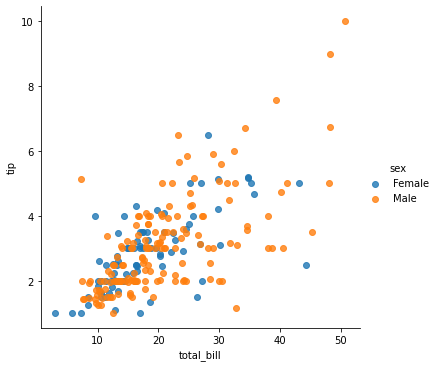

In [97]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

Male clients coming in large groups tend to givr more tips than small groups
More data points are from Men.
Most female clients come in small groups and pay tips less tips than men.